In [1]:
#importing python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#Loading CSV data file using pandas
df=pd.read_csv('C:\\Users\\hp\\Desktop\\placements\\Python\\EDA Project\\EDA Project-2---Netflix\\netflix_titles.csv')

In [3]:
#df.shape() shows the no. of rows and columns present in the data set 
df.shape

(8807, 12)

In [4]:
#df.describe(),Tells us some basic stats of tha data
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
#df.info() gives data type and count of the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
#for first five rows we use .head() function
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Data cleaning

In [8]:
# To get the total number of null values in each column 
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
#Changing the data type of date from object to datetime64
df['date_added']=pd.to_datetime(df['date_added'],format='mixed')

In [10]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Handling missing values

In [12]:
#filling null values of column rating,director,cast,country as unavailable
df.fillna({'rating':'unavailable', 'director':'unavailable', 'cast':'unavailable', 'country':'unavailable'}, inplace=True)

In [13]:
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

In [14]:
#Rows having date_added as null
df[df.date_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,unavailable,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,unavailable,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,unavailable,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,unavailable,Igor Dmitriev,unavailable,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,unavailable,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,unavailable,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,unavailable,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,unavailable,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [15]:
# substituting the null values of date_added column with latest date of the dataset
most_recent_entry_date=df['date_added'].max()
df.fillna({'date_added':most_recent_entry_date},inplace=True)

In [16]:
df[df.show_id=='s8183']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8182,s8183,TV Show,The Adventures of Figaro Pho,unavailable,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,2021-09-25,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [17]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

Durations data input error

In [18]:
#In some rows rating and duration got interchanged
df[df.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [19]:
#Filling those interchanged values
df.loc[5541,['duration']]=['74 min']
df.loc[5794,['duration']]=['84 min']
df.loc[5813,['duration']]=['66 min']

In [20]:
df.loc[5541,['rating']]=['unavailable']
df.loc[5794,['rating']]=['unavailable']
df.loc[5813,['rating']]=['unavailable']

In [21]:
#The data is cleaned now
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [22]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unavailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unavailable,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unavailable,unavailable,unavailable,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Exploratory Data Analysis

In [23]:
#counting the no. of movies and Tv_shows from the dataset
df.type.value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

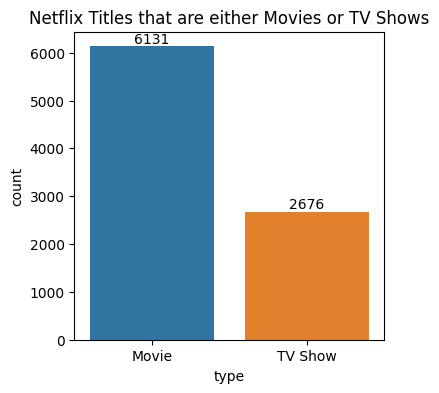

In [24]:
#PLotting a countplot chart for no. of movies and Tv_shows in Netflix data
plt.figure(figsize=(4,4))
ax=sns.countplot(x='type',data=df)
plt.title('Netflix Titles that are either Movies or TV Shows')
for bars in ax.containers:
    ax.bar_label(bars)


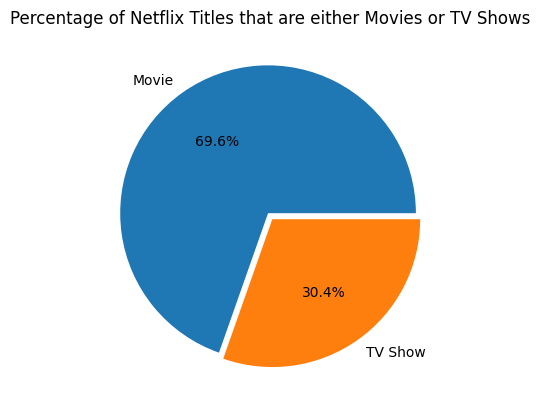

In [25]:
#Plotting a Pie chart which shows the percentage of movies and tv_shows released by netflix
plt.title('Percentage of Netflix Titles that are either Movies or TV Shows')
g=plt.pie(df.type.value_counts(),labels=df.type.value_counts().index,explode=(0.025,0.025),autopct='%1.1f%%')
plt.show()

Country Analysis

In [26]:
#count of ( movies and Tv_shows) released by every country
df.country.value_counts().head(10)

country
United States     2818
India              972
unavailable        831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

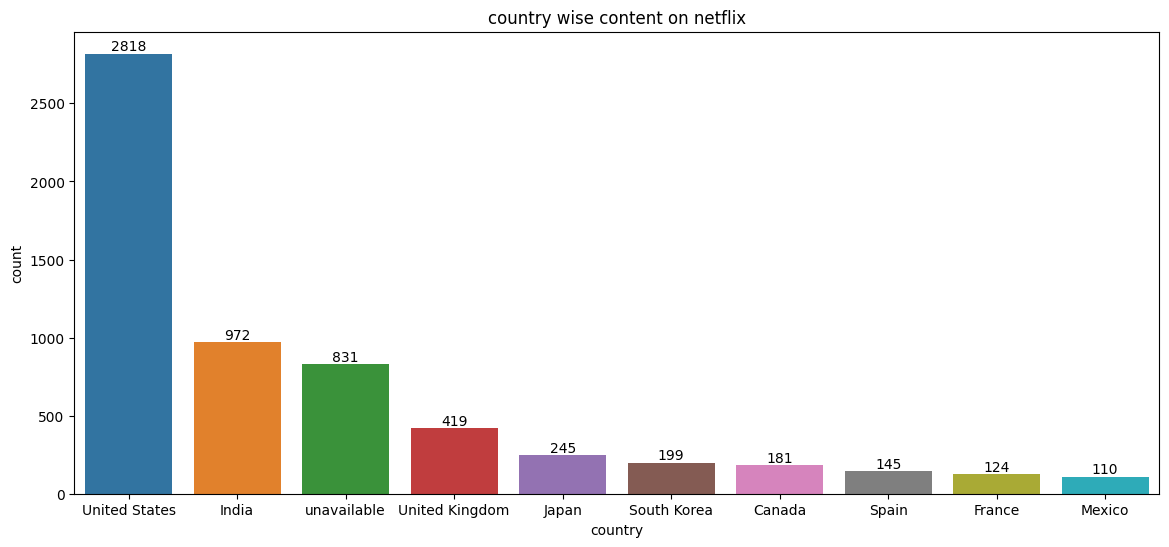

In [27]:
#PLotting a countplot chart for count (movies and Tv_shows)  relased by top 10 countries
plt.figure(figsize=(14,6))
ax=sns.countplot(x='country',order=df.country.value_counts().index[0:10],data=df)
plt.title('country wise content on netflix')

for bars in ax.containers:
    ax.bar_label(bars)

In [28]:
movie_countries=df[df['type']=='Movie']
tv_show_countries=df[df['type']=='TV Show']

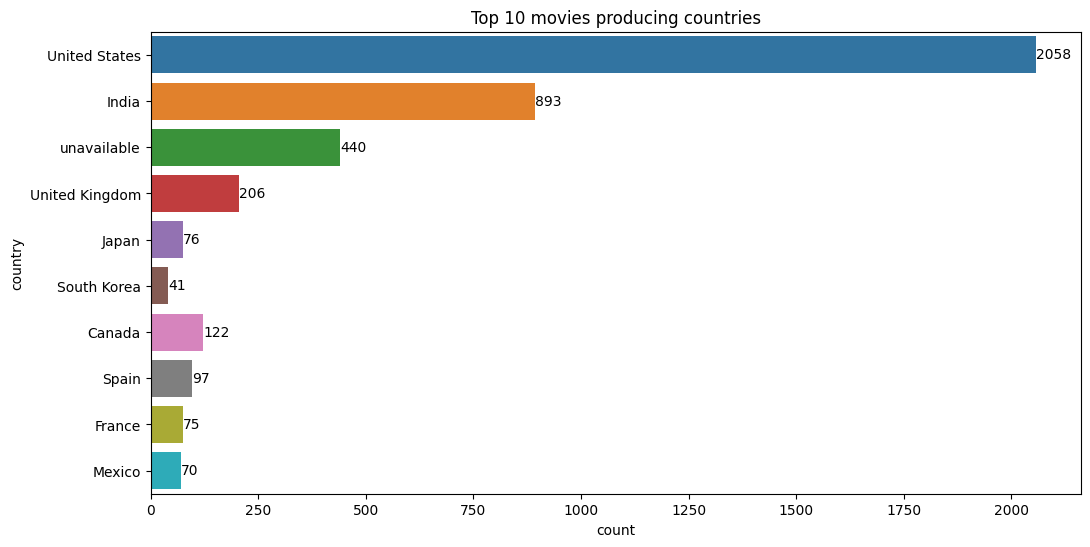

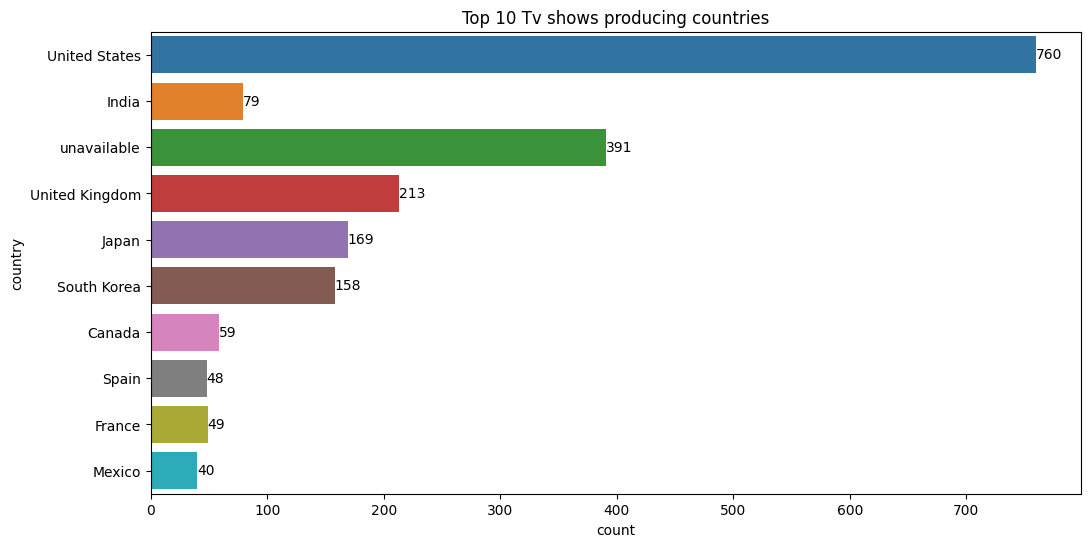

In [29]:
#Top 10  movie producing countries
plt.figure(figsize=(12,6))
ax=sns.countplot(y='country',order=df.country.value_counts().index[0:10],data=movie_countries)
plt.title('Top 10 movies producing countries')

for bars in ax.containers:
    ax.bar_label(bars)
    
    
#Top 10 Tv_shows producing countries
plt.figure(figsize=(12,6))
ax=sns.countplot(y='country',order=df.country.value_counts().index[0:10],data=tv_show_countries)
plt.title('Top 10 Tv shows producing countries')

for bars in ax.containers:
    ax.bar_label(bars)
    

Rating analysis

In [30]:
#Top ratings on netflix
df.rating.value_counts().head(10)

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64

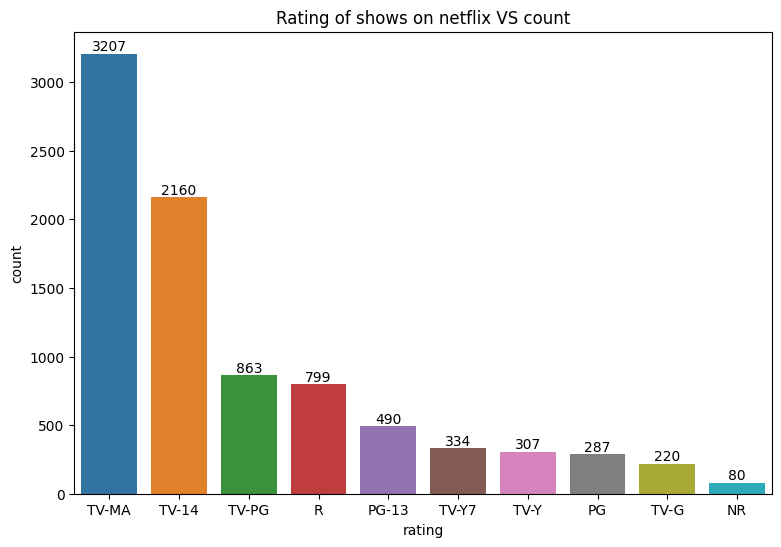

In [31]:
#Bar chart showing the rating count
plt.figure(figsize=(9,6))
ax=sns.countplot(x='rating',order=df.rating.value_counts().index[0:10],data=df)
plt.title('Rating of shows on netflix VS count')

for bars in ax.containers:
    ax.bar_label(bars)

Analysis of Content over years

In [32]:
#count of No.of movies released in each year by netflix
df.release_year.value_counts()[:20]

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
2007      88
2005      80
2004      64
2003      61
2002      51
Name: count, dtype: int64

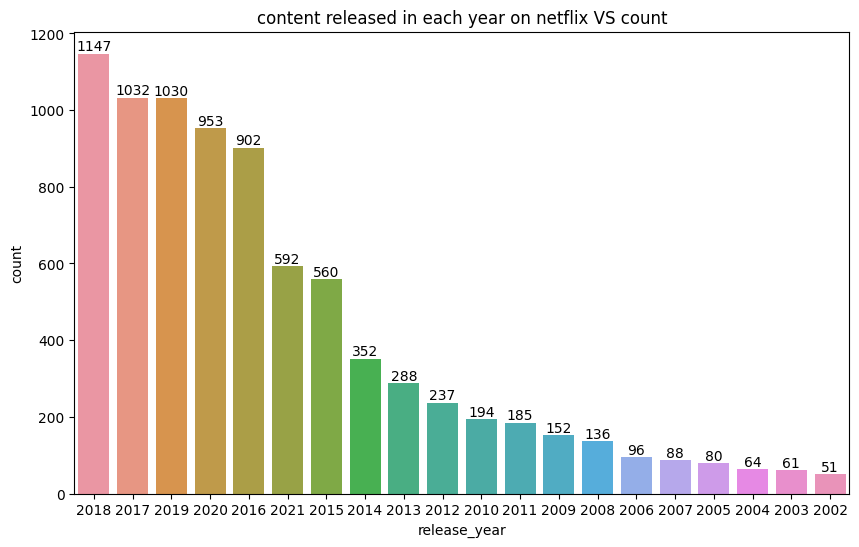

In [33]:
#Bar chart showing count of total no. movies released  each year 
plt.figure(figsize=(10,6))
ax=sns.countplot(x='release_year',order=df.release_year.value_counts().index[0:20],data=df)
plt.title('content released in each year on netflix VS count')

for bars in ax.containers:
    ax.bar_label(bars)

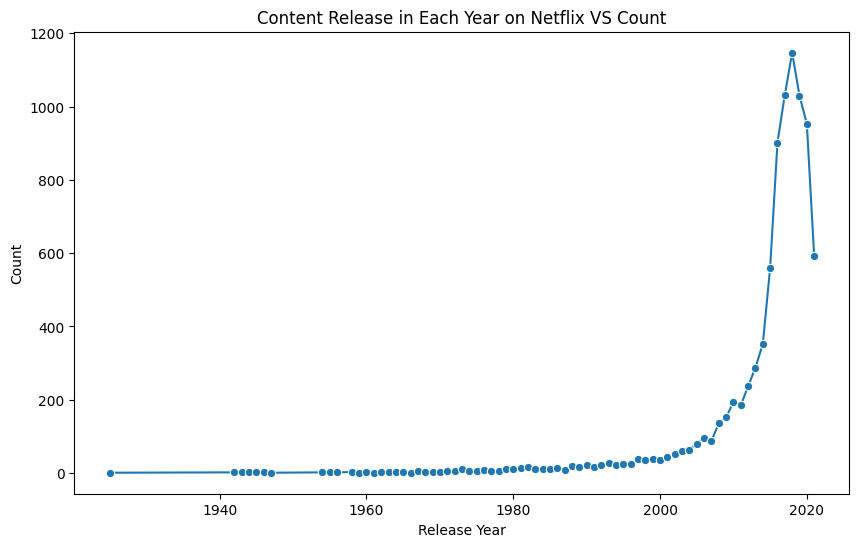

In [34]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='release_year', y='count', data=df.release_year.value_counts().reset_index(), marker='o')
plt.title('Content Release in Each Year on Netflix VS Count')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

Director analysis

In [35]:
#Top 20 directors based on no. of movies released
df.director.value_counts()[:20]

director
unavailable               2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Steven Spielberg            11
Don Michael Paul            10
David Dhawan                 9
Yılmaz Erdoğan               8
Quentin Tarantino            8
Lance Bangs                  8
Shannon Hartman              8
Troy Miller                  8
Kunle Afolayan               8
Johnnie To                   8
Name: count, dtype: int64

Popular genres analysis

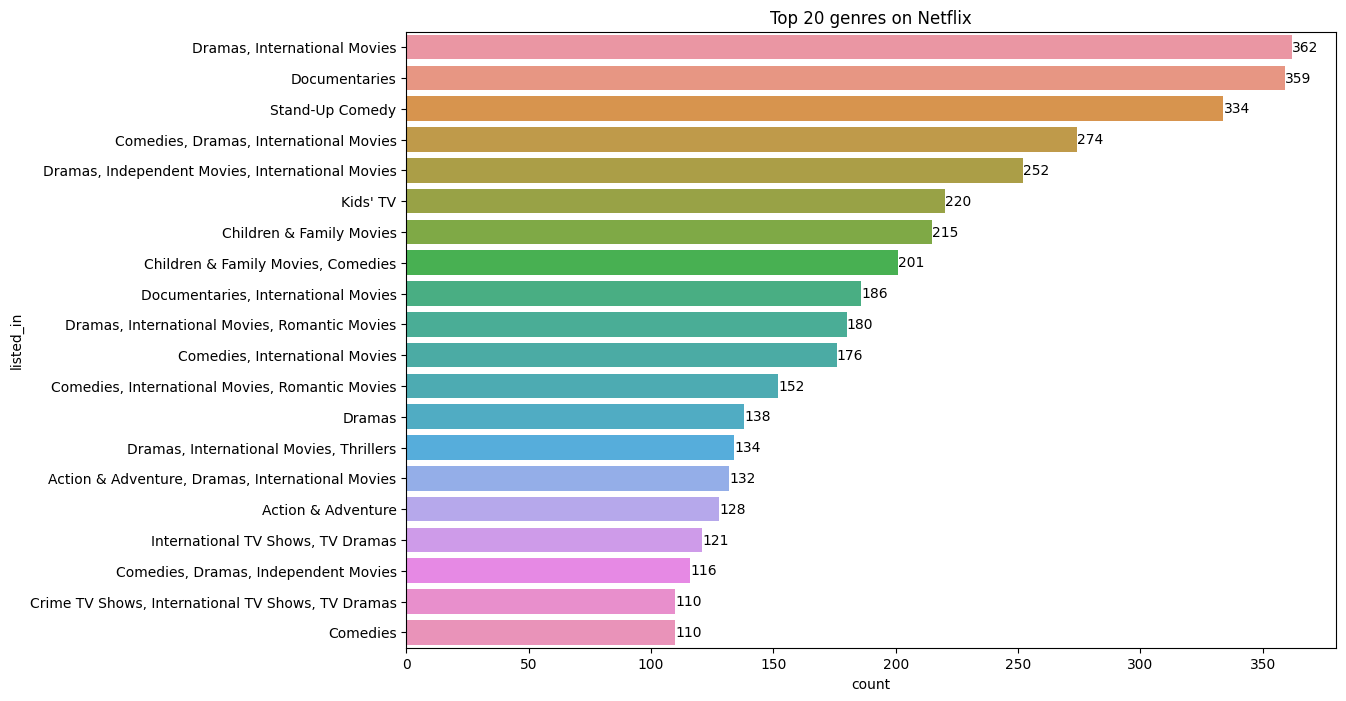

In [36]:
# Top 20 genres on netflix
plt.figure(figsize=(12,8))
ax=sns.countplot(y='listed_in',order=df.listed_in.value_counts().index[0:20],data=df)
plt.title('Top 20 genres on Netflix')

for bars in ax.containers:
    ax.bar_label(bars)

Analysing data set of country INDIA

In [37]:
f1=df[df['country']=='India']
f1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,TV Show,Kota Factory,unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
39,s40,TV Show,Chhota Bheem,unavailable,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-09-16,2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ..."
50,s51,TV Show,Dharmakshetra,unavailable,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,2021-09-15,2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup..."
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,unavailable,unavailable,India,2021-09-15,2014,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...
...,...,...,...,...,...,...,...,...,...,...,...,...
8773,s8774,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,2018-01-01,2006,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...
8775,s8776,TV Show,Yeh Meri Family,unavailable,"Vishesh Bansal, Mona Singh, Akarsh Khurana, Ah...",India,2018-08-31,2018,TV-PG,1 Season,"International TV Shows, TV Comedies","In the summer of 1998, middle child Harshu bal..."
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,2019-12-31,2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,2018-02-15,2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...


In [38]:
#Top 10 directors of India based on no. of movies released
f1.director.value_counts()[:10]

director
unavailable           82
David Dhawan           9
Ram Gopal Varma        7
Rajkumar Santoshi      6
Imtiaz Ali             6
Anees Bazmee           6
Sooraj R. Barjatya     6
Anurag Kashyap         5
Indra Kumar            5
Mahesh Manjrekar       5
Name: count, dtype: int64

In [39]:
#count of No.of movies released in each year on netflix in India
f1.release_year.value_counts()[:10]

release_year
2017    101
2018     94
2019     87
2020     75
2016     73
2015     62
2013     54
2014     51
2012     38
2010     35
Name: count, dtype: int64

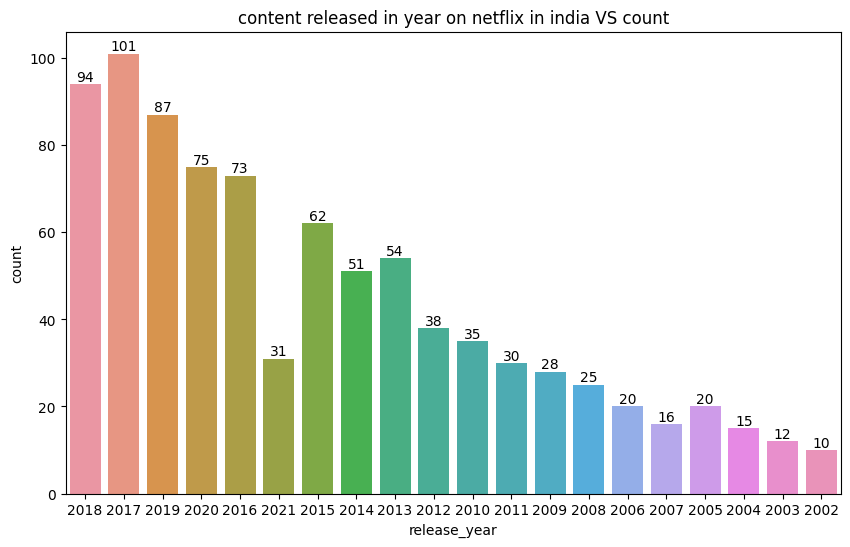

In [40]:
#Bar chart showing count of total no. movies released each year on Netflix in india
plt.figure(figsize=(10,6))
ax=sns.countplot(x='release_year',order=df['release_year'].value_counts().index[0:20],data=f1)
plt.title('content released in year on netflix in india VS count')

for bars in ax.containers:
    ax.bar_label(bars)

In [41]:
f1.rating.value_counts().head(10)

rating
TV-14    550
TV-MA    248
TV-PG    134
TV-Y7     14
TV-G       9
TV-Y       5
PG-13      4
NR         4
PG         2
R          1
Name: count, dtype: int64

Summary

In this project,Python programming language and its libraries like Pandas, NumPy, Matplotlib, and Seaborn is used to explore the Netflix dataset.
Here are the main findings:

• Netflix has a higher number of movies compared to TV shows, making it primarily a movie-centric platform.

• Production by Country: The United States leads in content production on Netflix, followed by India.

• Top Directors: Rajiv Chilaka has the most content on Netflix, followed by Raúl Campos and Jan Suter.

• Content Release Trends: 2018 had the highest number of new releases on Netflix.

• Popular Genres: Viewers prefer to watch International Movies and Dramas on Netflix.

• Most of the Content on Netflix (Movies and TV shows combined) is for Mature Audiences.

• Indian content: -David Dhawan has the most Indian content on Netflix.
                  -In 2017, there were many new content releases from India.
                  -Indian productions often have content with TV-14 and TV-MA ratings.

These insights can help Netflix improve content selection and understand audience preferences.

In conclusion, this project shows how exploratory data analysis can uncover valuable information from large datasets, helping streaming platforms like Netflix make informed decisions about their content offerings and audience engagement.